CATS VS DOGS


In [1]:
total_data = "C:/Users/elisa/OneDrive/Escritorio/Data Sciencie/DeepLearning/data/raw/archive/kagglecatsanddogs_3367a/PetImages"

In [2]:
import os
import shutil

# Ruta de la carpeta de entrenamiento
ruta_entrenamiento = "C:/Users/elisa/OneDrive/Escritorio/Data Sciencie/DeepLearning/data/raw/archive/kagglecatsanddogs_3367a/PetImages/train"

# Crear la carpeta de entrenamiento si no existe
if not os.path.exists(ruta_entrenamiento):
    os.makedirs(ruta_entrenamiento)

# Subcarpetas dentro de la carpeta de entrenamiento (dog y cat)
subcarpetas = ['dog', 'cat']

# Iterar sobre las subcarpetas
for subcarpeta in subcarpetas:
    # Ruta de la subcarpeta original (por ejemplo, "C:/.../PetImages/dog")
    ruta_subcarpeta_original = os.path.join(total_data, subcarpeta)
    
    # Ruta de la subcarpeta de entrenamiento (por ejemplo, "C:/.../Train/dog")
    ruta_subcarpeta_entrenamiento = os.path.join(ruta_entrenamiento, subcarpeta)
    
    # Crear la subcarpeta de entrenamiento si no existe
    if not os.path.exists(ruta_subcarpeta_entrenamiento):
        os.makedirs(ruta_subcarpeta_entrenamiento)
    
    # Obtener la lista de archivos en la subcarpeta original
    archivos = os.listdir(ruta_subcarpeta_original)
    
    # Iterar sobre los archivos y copiarlos a la subcarpeta de entrenamiento
    for archivo in archivos:
        ruta_origen = os.path.join(ruta_subcarpeta_original, archivo)
        ruta_destino = os.path.join(ruta_subcarpeta_entrenamiento, archivo)
        shutil.copy(ruta_origen, ruta_destino)

print("Proceso completado.")

Proceso completado.


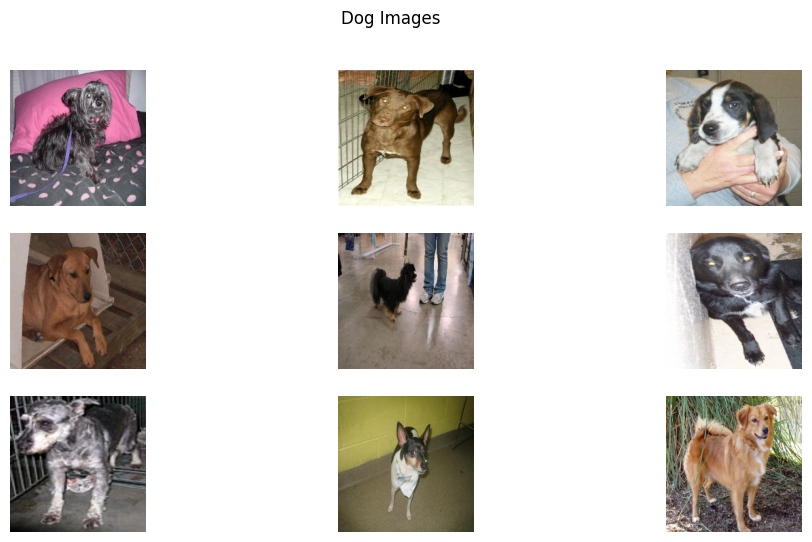

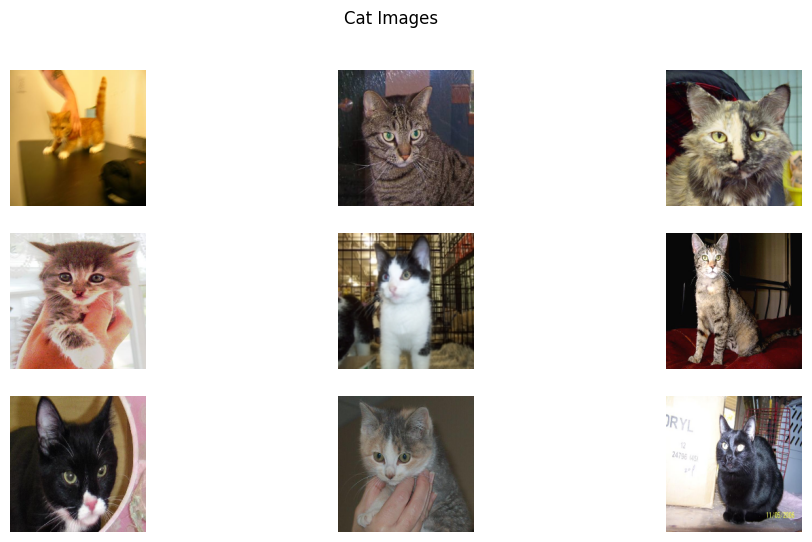

In [4]:
import os
import cv2
import matplotlib.pyplot as plt

# Ruta de la carpeta de entrenamiento
ruta_entrenamiento = "C:/Users/elisa/OneDrive/Escritorio/Data Sciencie/DeepLearning/data/raw/archive/kagglecatsanddogs_3367a/PetImages/train"

# Función para cargar y redimensionar las imágenes
def load_and_resize_images(folder_path, size=(200, 200)):
    images = []
    
    # Verificar si la ruta es un directorio
    if os.path.isdir(folder_path):
        # Tomar solo las primeras nueve imágenes
        for filename in os.listdir(folder_path)[:9]:
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convertir de BGR a RGB
            
            # Redimensionar la imagen
            img = cv2.resize(img, size)
            
            images.append(img)
    
    return images

# Cargar y redimensionar las primeras nueve imágenes de perros
dog_images = load_and_resize_images(os.path.join(ruta_entrenamiento, 'dog'))

# Cargar y redimensionar las primeras nueve imágenes de gatos
cat_images = load_and_resize_images(os.path.join(ruta_entrenamiento, 'cat'))

# Función para mostrar imágenes
def show_images(images, title):
    plt.figure(figsize=(12, 6))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.axis("off")
    plt.suptitle(title)
    plt.show()

# Mostrar las primeras nueve imágenes de perros
show_images(dog_images, "Dog Images")

# Mostrar las primeras nueve imágenes de gatos
show_images(cat_images, "Cat Images")

In [5]:
import os
import shutil
import random

# Ruta de la carpeta original
total_data = "C:/Users/elisa/OneDrive/Escritorio/Data Sciencie/DeepLearning/data/raw/archive/kagglecatsanddogs_3367a/PetImages"

# Ruta de la carpeta de prueba
ruta_prueba = os.path.join(total_data, "test")

# Crear la carpeta de prueba si no existe
if not os.path.exists(ruta_prueba):
    os.makedirs(ruta_prueba)

# Subcarpetas dentro de la carpeta de prueba (dog y cat)
subcarpetas_prueba = ['dog', 'cat']

# Porcentaje de imágenes que se tomarán para la prueba
porcentaje_prueba = 20

# Iterar sobre las subcarpetas
for subcarpeta_prueba in subcarpetas_prueba:
    # Ruta de la subcarpeta original (por ejemplo, "C:/.../PetImages/dog")
    ruta_subcarpeta_original = os.path.join(total_data, subcarpeta_prueba)
    
    # Ruta de la subcarpeta de prueba (por ejemplo, "C:/.../PetImages/test/dog")
    ruta_subcarpeta_prueba = os.path.join(ruta_prueba, subcarpeta_prueba)
    
    # Crear la subcarpeta de prueba si no existe
    if not os.path.exists(ruta_subcarpeta_prueba):
        os.makedirs(ruta_subcarpeta_prueba)
    
    # Obtener la lista de archivos en la subcarpeta original
    archivos = os.listdir(ruta_subcarpeta_original)
    
    # Calcular el número de imágenes para la prueba (20%)
    num_imagenes_prueba = int(len(archivos) * (porcentaje_prueba / 100))
    
    # Seleccionar aleatoriamente las imágenes para la prueba
    imagenes_prueba = random.sample(archivos, num_imagenes_prueba)
    
    # Iterar sobre las imágenes seleccionadas y copiarlas a la subcarpeta de prueba
    for imagen in imagenes_prueba:
        ruta_origen = os.path.join(ruta_subcarpeta_original, imagen)
        ruta_destino = os.path.join(ruta_subcarpeta_prueba, imagen)
        shutil.copy(ruta_origen, ruta_destino)

print("Proceso completado.")

Proceso completado.


In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rutas de las carpetas de entrenamiento seleccionado y prueba
ruta_entrenamiento = "C:/Users/elisa/OneDrive/Escritorio/Data Sciencie/DeepLearning/data/raw/archive/kagglecatsanddogs_3367a/PetImages/train"
ruta_prueba = "C:/Users/elisa/OneDrive/Escritorio/Data Sciencie/DeepLearning/data/raw/archive/kagglecatsanddogs_3367a/PetImages/test"

# Tamaño de lote (batch size)
tamano_lote = 32

# Generador de datos para entrenamiento seleccionado
generador_entrenamiento_seleccionado = ImageDataGenerator(rescale=1./255)

trdata_seleccionado = generador_entrenamiento_seleccionado.flow_from_directory(
    directory=ruta_entrenamiento,
    target_size=(224, 224),
    batch_size=tamano_lote,
    class_mode='binary'  # Asegúrate de que esté configurado como 'binary' para clasificación binaria
)

# Generador de datos para prueba seleccionado
generador_prueba_seleccionado = ImageDataGenerator(rescale=1./255)

tsdata = generador_prueba_seleccionado.flow_from_directory(
    directory=ruta_prueba,
    target_size=(224, 224),
    batch_size=tamano_lote,
    class_mode='binary'  # Puedes cambiar a 'categorical' si tienes más de dos clases
)

Found 24959 images belonging to 2 classes.
Found 14793 images belonging to 2 classes.


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Create the model
model = Sequential()

# Add a convolutional layer with 32 filters, each of size 3x3, and use 'relu' activation
model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3), activation='relu'))
# Add a max pooling layer with pool size 2x2
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another convolutional layer with 64 filters, each of size 3x3, and use 'relu' activation
model.add(Conv2D(64, (3, 3), activation='relu'))
# Add another max pooling layer with pool size 2x2
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output before passing it to the fully connected layers
model.add(Flatten())

# Add a fully connected layer with 128 units and 'relu' activation
model.add(Dense(units=128, activation='relu'))
# Add dropout for regularization
model.add(Dropout(0.5))

# Add the output layer with 1 unit (binary classification) and 'sigmoid' activation
model.add(Dense(units=1, activation='sigmoid'))

In [23]:
from keras.optimizers import Adam

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [24]:
model.fit(trdata_seleccionado, epochs=1, validation_data=tsdata)

728/780 [===========================>..] - ETA: 32s - loss: 0.6636 - accuracy: 0.6475

c:\Users\elisa\AppData\Local\Programs\Python\Python39\lib\site-packages\PIL\TiffImagePlugin.py:870: UserWarning: Truncated File Read
  warnings.warn(str(msg))


780/780 [==============================] - 555s 711ms/step - loss: 0.6598 - accuracy: 0.6495 - val_loss: 0.5320 - val_accuracy: 0.7400


In [25]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Crear ModelCheckpoint para guardar el mejor modelo durante el entrenamiento
checkpoint = ModelCheckpoint("../models/tu_modelo.h5", monitor="val_accuracy", verbose=1, save_best_only=True, save_weights_only=False, mode="auto")

# Crear EarlyStopping para detener el entrenamiento si la precisión de validación deja de mejorar
early = EarlyStopping(monitor="val_accuracy", patience=3, verbose=1, mode="auto")

# Compilar el modelo (asegúrate de haber definido tu modelo antes de esta parte)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo con los callbacks
hist = model.fit(trdata_seleccionado, steps_per_epoch=100, validation_data=tsdata, validation_steps=10, epochs=3, callbacks=[checkpoint, early])

Epoch 1/3
100/100 [==============================] - ETA: 0s - loss: 0.5479 - accuracy: 0.7294
Epoch 1: val_accuracy improved from -inf to 0.67500, saving model to ../models\tu_modelo.h5


c:\Users\elisa\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


100/100 [==============================] - 60s 591ms/step - loss: 0.5479 - accuracy: 0.7294 - val_loss: 0.5813 - val_accuracy: 0.6750
Epoch 2/3
100/100 [==============================] - ETA: 0s - loss: 0.5089 - accuracy: 0.7546
Epoch 2: val_accuracy improved from 0.67500 to 0.73438, saving model to ../models\tu_modelo.h5
100/100 [==============================] - 65s 652ms/step - loss: 0.5089 - accuracy: 0.7546 - val_loss: 0.4994 - val_accuracy: 0.7344
Epoch 3/3
100/100 [==============================] - ETA: 0s - loss: 0.4984 - accuracy: 0.7634
Epoch 3: val_accuracy improved from 0.73438 to 0.75937, saving model to ../models\tu_modelo.h5
100/100 [==============================] - 63s 630ms/step - loss: 0.4984 - accuracy: 0.7634 - val_loss: 0.4994 - val_accuracy: 0.7594



Los resultados que has proporcionado indican que el modelo está mejorando en cada época en términos de precisión tanto en el conjunto de entrenamiento como en el conjunto de validación. En general, estos resultados son positivos:

En la primera época, la precisión en el conjunto de validación mejoró significativamente del 67.5% al 73.4%.
En la segunda época, la precisión en el conjunto de validación mejoró aún más, alcanzando el 73.4% al 75.9%.
Esto sugiere que el modelo está aprendiendo patrones útiles en los datos de entrenamiento y puede generalizar bien a datos no vistos en el conjunto de validación. Sin embargo, para una evaluación más completa, podrías considerar la precisión y pérdida en el conjunto de prueba, ya que es otro conjunto de datos que el modelo no ha visto durante el entrenamiento.

Recuerda también que estos resultados pueden variar según la complejidad de tu problema y la cantidad de datos disponibles. Si puedes evaluar el rendimiento en un conjunto de prueba separado, eso proporcionaría una evaluación más robusta del rendimiento del modelo en datos no vistos.

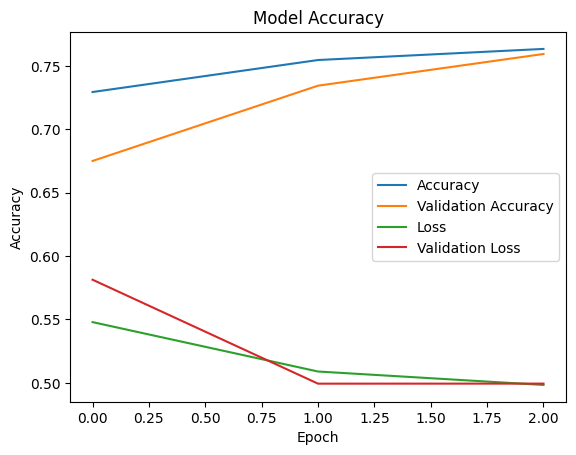

In [26]:
import matplotlib.pyplot as plt

plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])

# Configure the Plot Layout
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy", "Validation Accuracy", "Loss", "Validation Loss"])

# Plot
plt.show()

1/1 [==============================] - 0s 267ms/step
Es un perro.


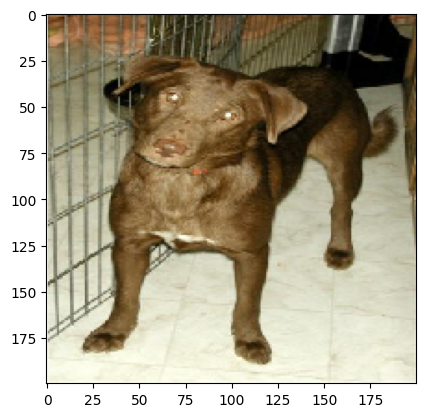

In [38]:
from keras.preprocessing import image
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

# Cargar el modelo entrenado
saved_model = load_model("../models/vgg16_1.h5")

# Ruta a la carpeta de prueba
test_folder = "C:/Users/elisa/OneDrive/Escritorio/Data Sciencie/DeepLearning/data/raw/archive/kagglecatsanddogs_3367a/PetImages/test/"

# Seleccionar una imagen de la carpeta de prueba (por ejemplo, la primera imagen de perro)
img_path = test_folder + "dog/1.jpg"

# Cargar la imagen y redimensionarla al tamaño esperado por tu modelo
img = image.load_img(img_path, target_size=(200, 200))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# Normalizar la imagen
img_array /= 255.0

# Realizar la predicción
prediction = saved_model.predict(img_array)

# Imprimir la predicción
if prediction[0][0] > prediction[0][1]:
    print("Es un gato.")
else:
    print("Es un perro.")

# Mostrar la imagen
plt.imshow(img)
plt.show()